### Breast Cancer Classification, Winsconsin,USA

#### The aim of this project is to give the accuret prediction of breast cancer cases wither it s malegnant or benign

#### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Add Data

In [7]:
df = pd.read_csv(r'data.csv')

#### Exploring Data Set

In [9]:
# Create function to autumate data exploration
def explor(x):
    print("......."*10)
    print ("Data Shape\n", x.shape)
    print("......."*10)
    print ("Data Info\n", x.info())
    print("......."*10)
    print ("Data Head\n", x.head())
    print("......."*10)
    print("Data Tail\n", x.tail())
    print("......."*10)
    print ("Data Sample\n", x.sample(2))
    print("......."*10)
    print ("Data Statistics\n", x.describe())
    print("......."*10)
    print ("Null Values\n", x.isnull().sum())
    print("......."*10)
    
explor(df)

......................................................................
Data Shape
 (569, 33)
......................................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean  

#### Data Processing

In [11]:
# Dropping unwanted columns "id" and Unnamed: 32"
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True) # axis = 1 if we removing column and should be 0 if we dropping row

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### Data Visualization

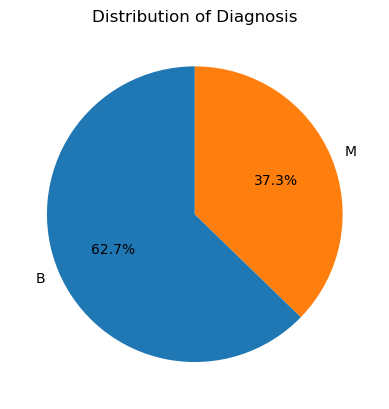

In [14]:
# diagnosis distribution
diag = df['diagnosis'].value_counts()
plt.pie(diag,labels = diag.index, autopct ='%1.1f%%', startangle =90)
plt.title('Distribution of Diagnosis')
plt.show()

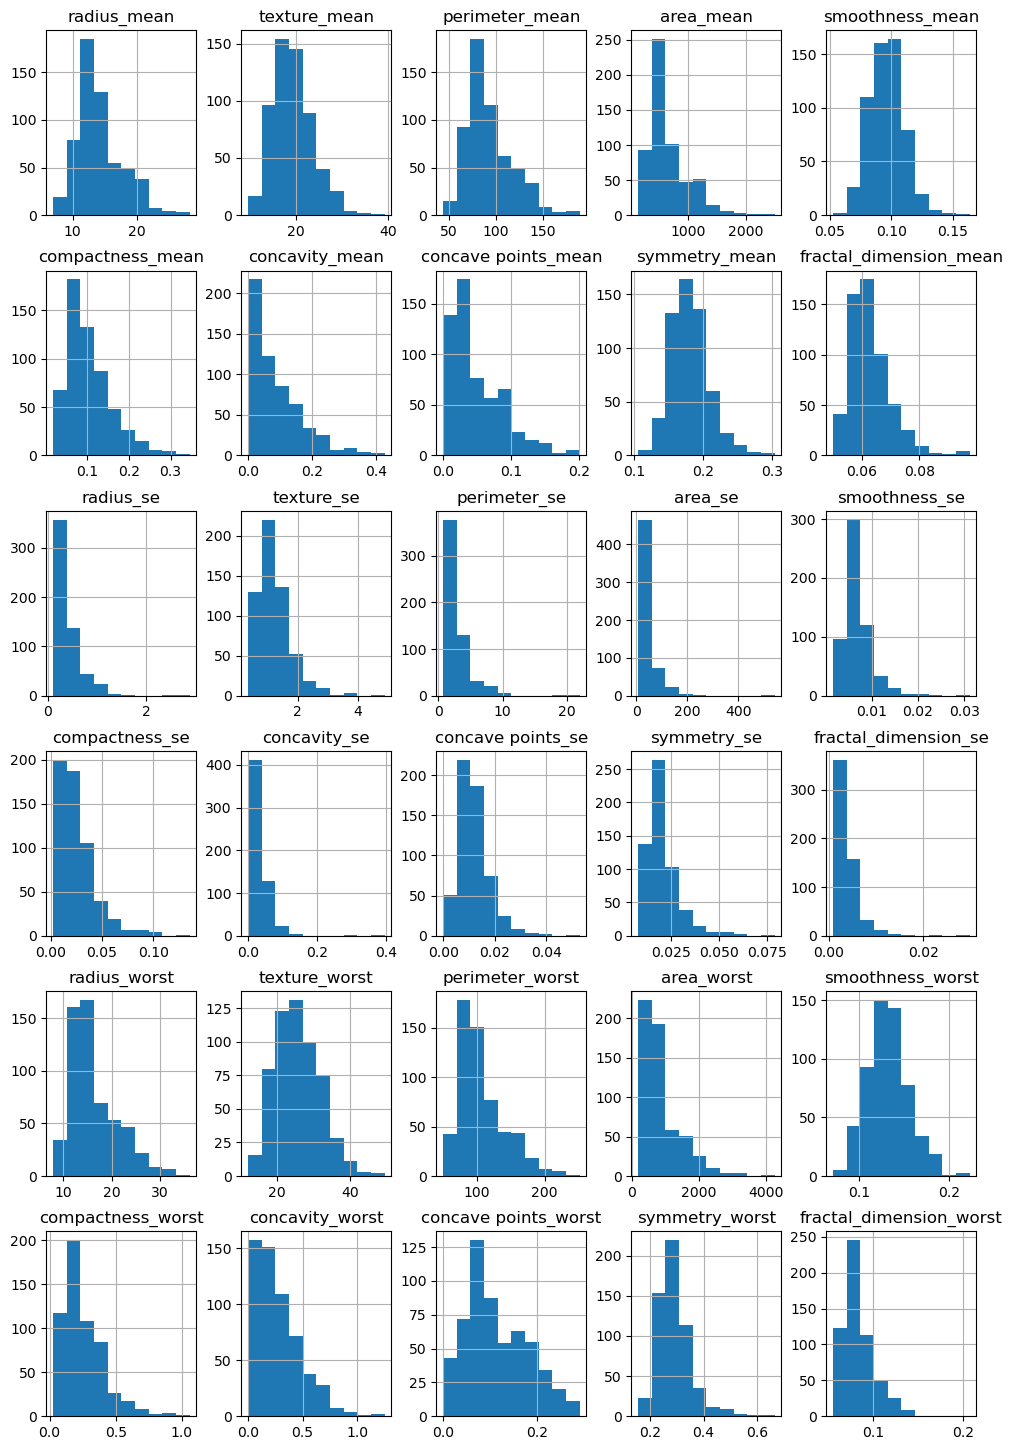

In [15]:
#Check data distribution
df.hist(figsize =(12,18), histtype = 'stepfilled')
plt.show()

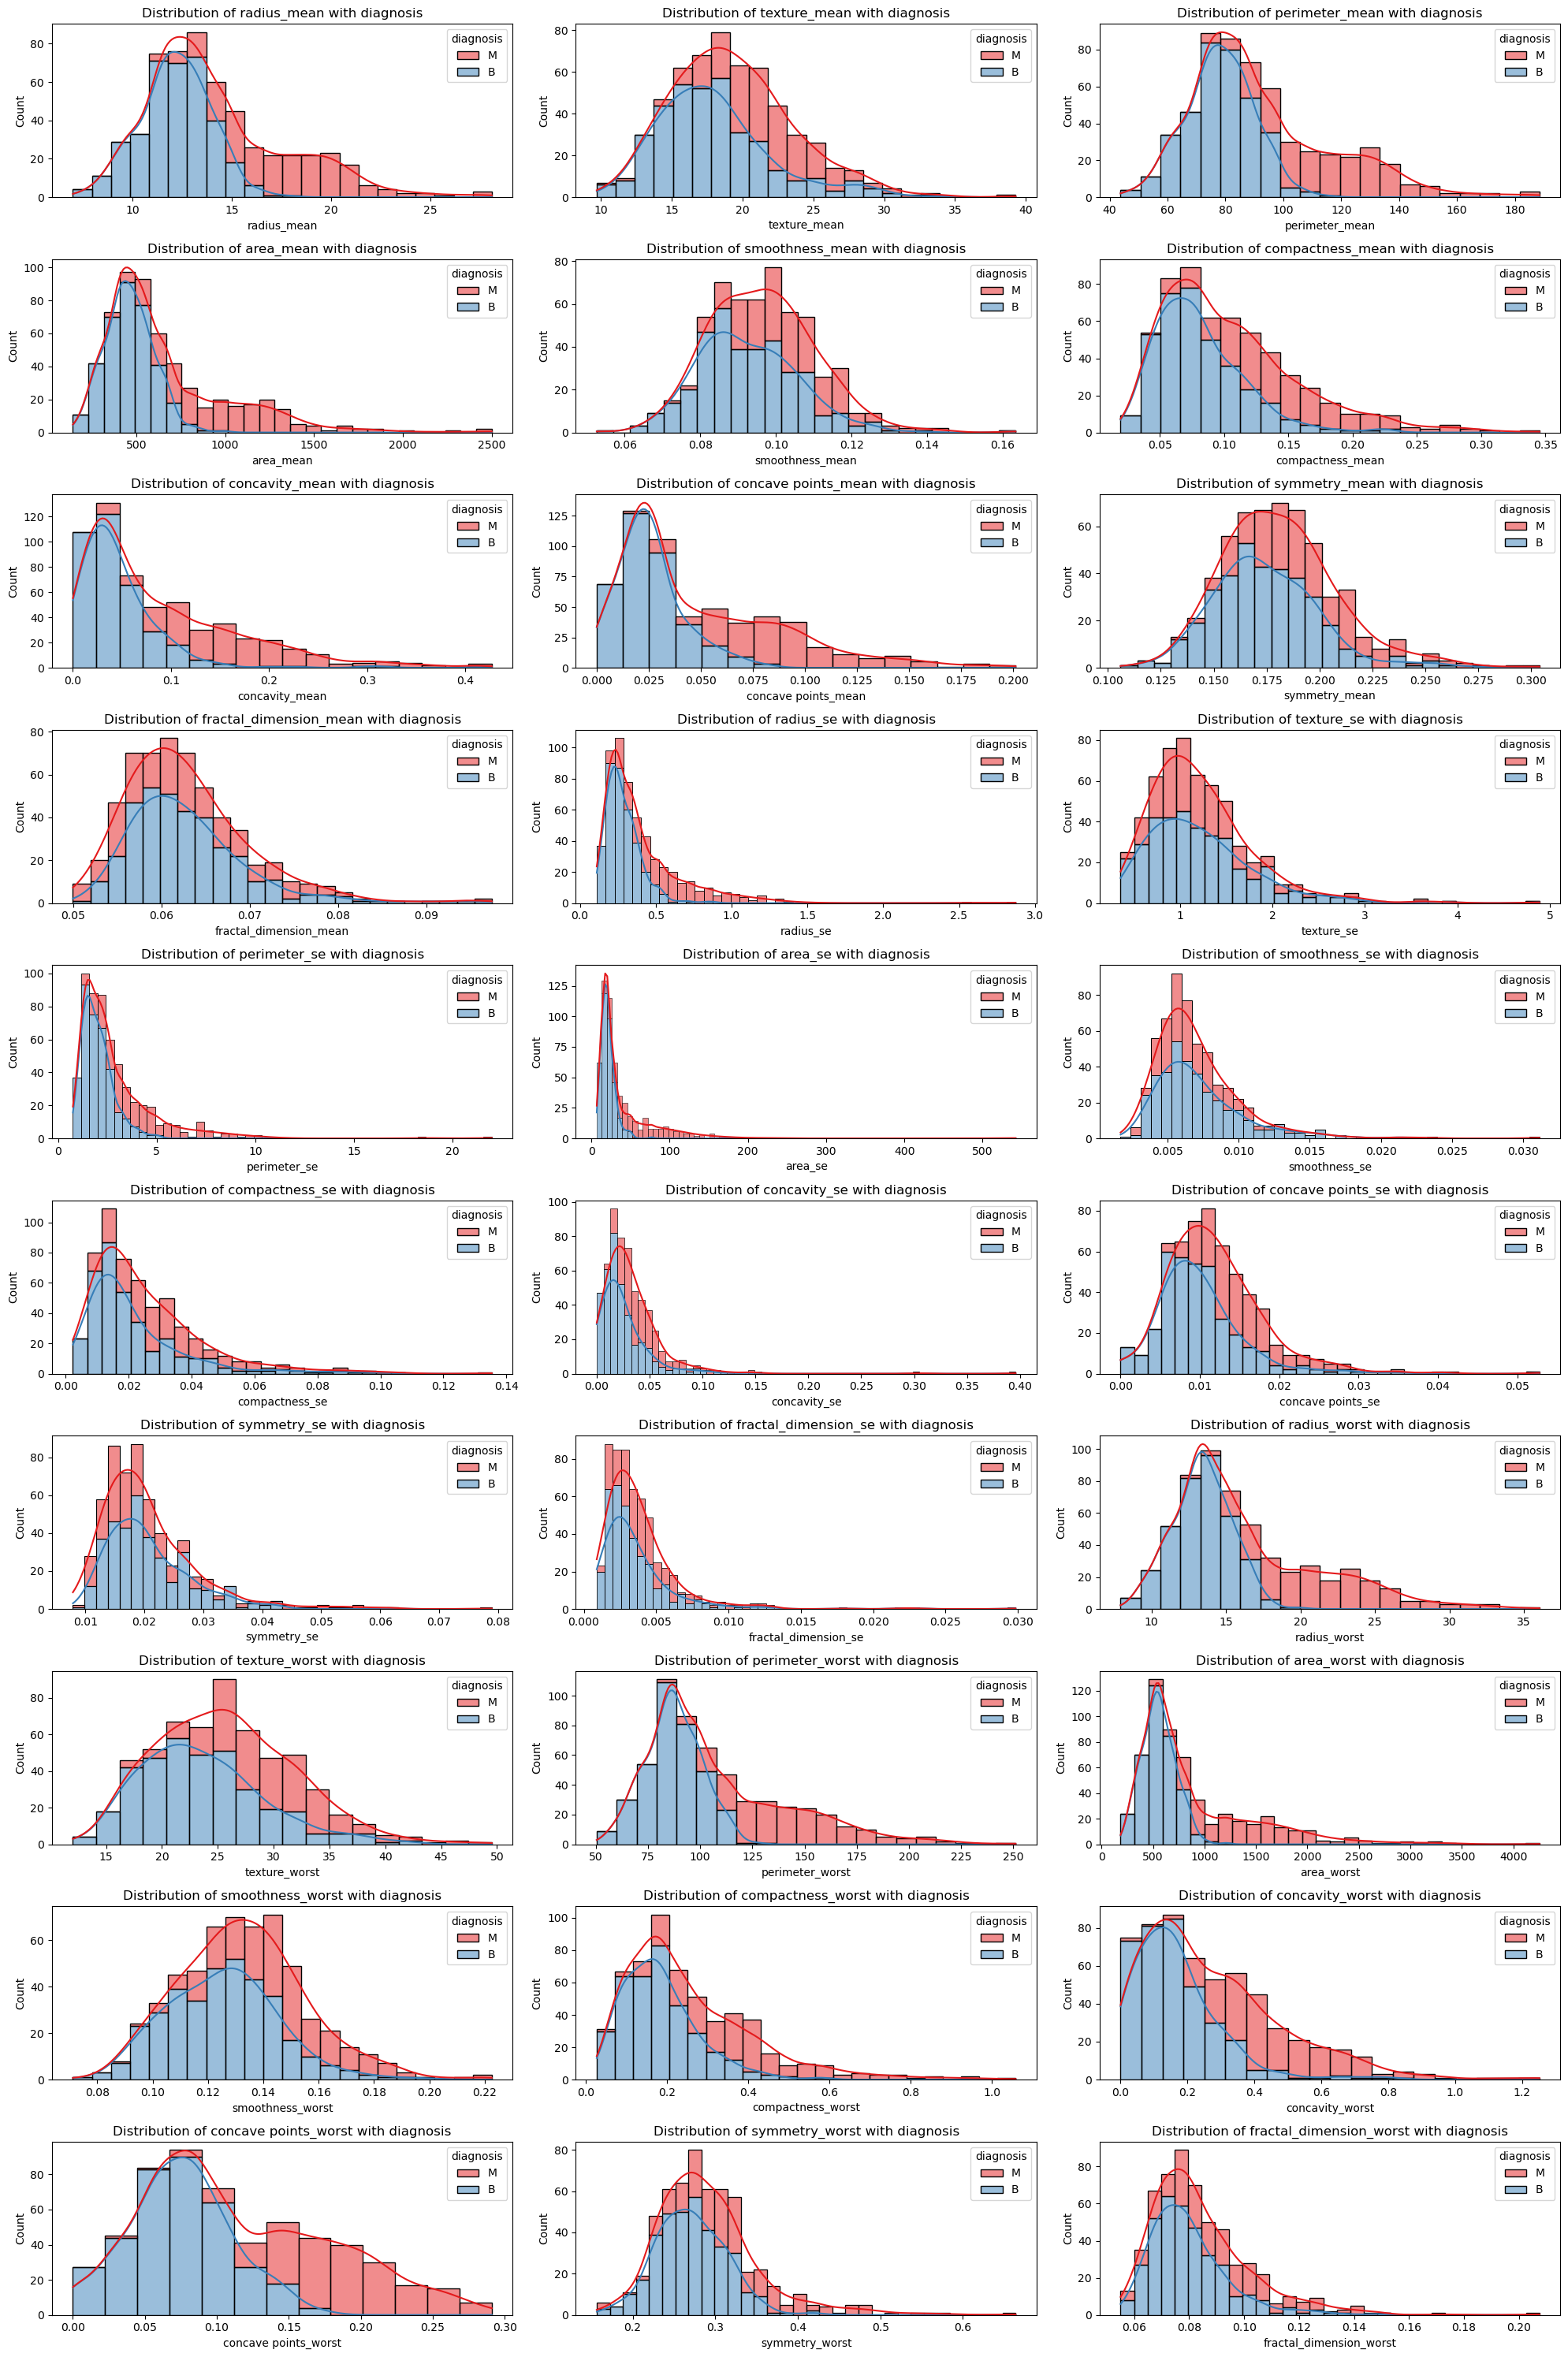

In [16]:
# Find distribution of diagnosis vs each features
hue = 'diagnosis'
plt.figure(figsize=(20, 30))

rows = (len(df.drop(hue, axis =1).columns) + 2) // 3 # calculationg number of rows in thefigure

for i, col in enumerate(df.drop(hue, axis = 1).columns, 1): # drop diagnosis from the comparison 

    plt.subplot(rows, 3, i)

    sns.histplot(df, x=col, hue=hue, palette="Set1", multiple="stack", kde=True)

    plt.title(f'Distribution of {col} with {hue}')

    plt.xlabel(col)

    plt.ylabel('Count')

plt.tight_layout()

plt.show()

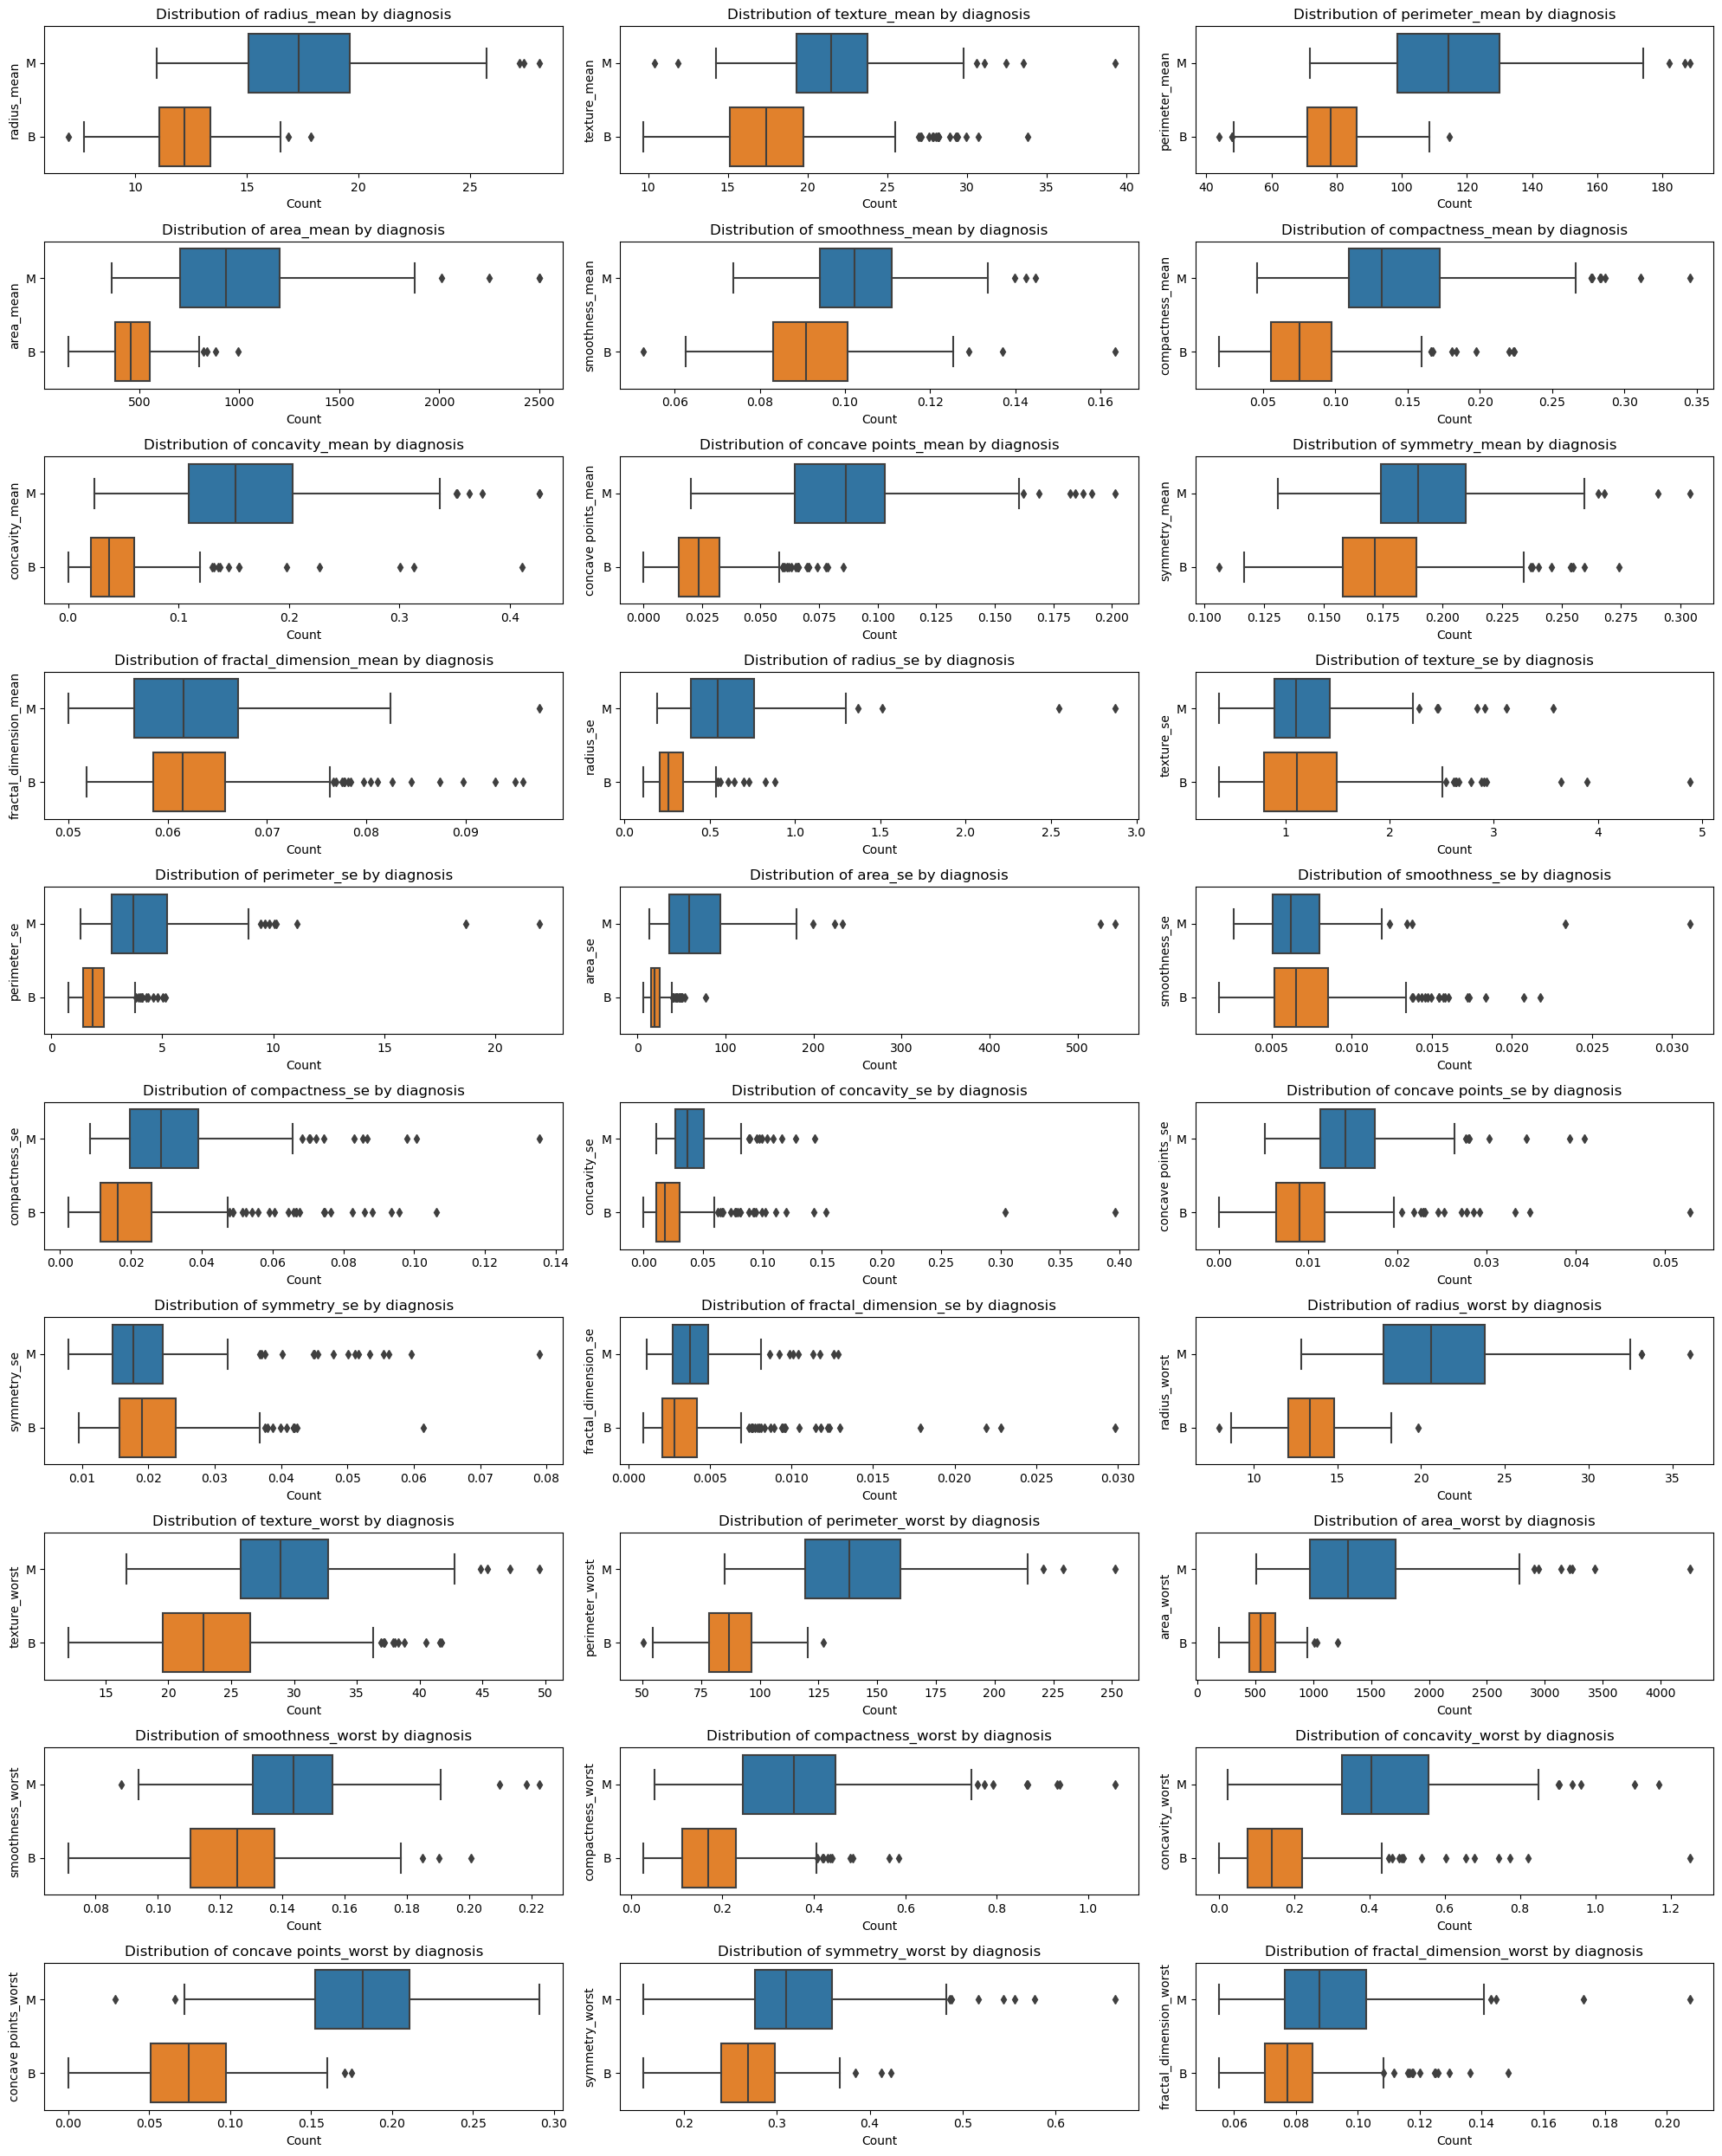

In [17]:
# boxplot of the diagnosis vs each feature
hue = 'diagnosis'

plt.figure(figsize=(20, 25))

rows = (len(df.drop(hue, axis = 1).columns) + 2) // 3

for i, col in enumerate(df.drop(hue, axis = 1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.boxplot(df, x=col, y = hue)

    plt.title(f'Distribution of {col} by {hue}')

    plt.ylabel(col)

    plt.xlabel('Count')
    

plt.tight_layout()

plt.show()


In [18]:
# Make duplication of the diagnosis column
df['diagnosis_int'] = df['diagnosis']
# Converting the diagnosis_int data type from str to Int
df['diagnosis_int'] = df['diagnosis_int'].replace({'M' : 1, 'B': 0})
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_int
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


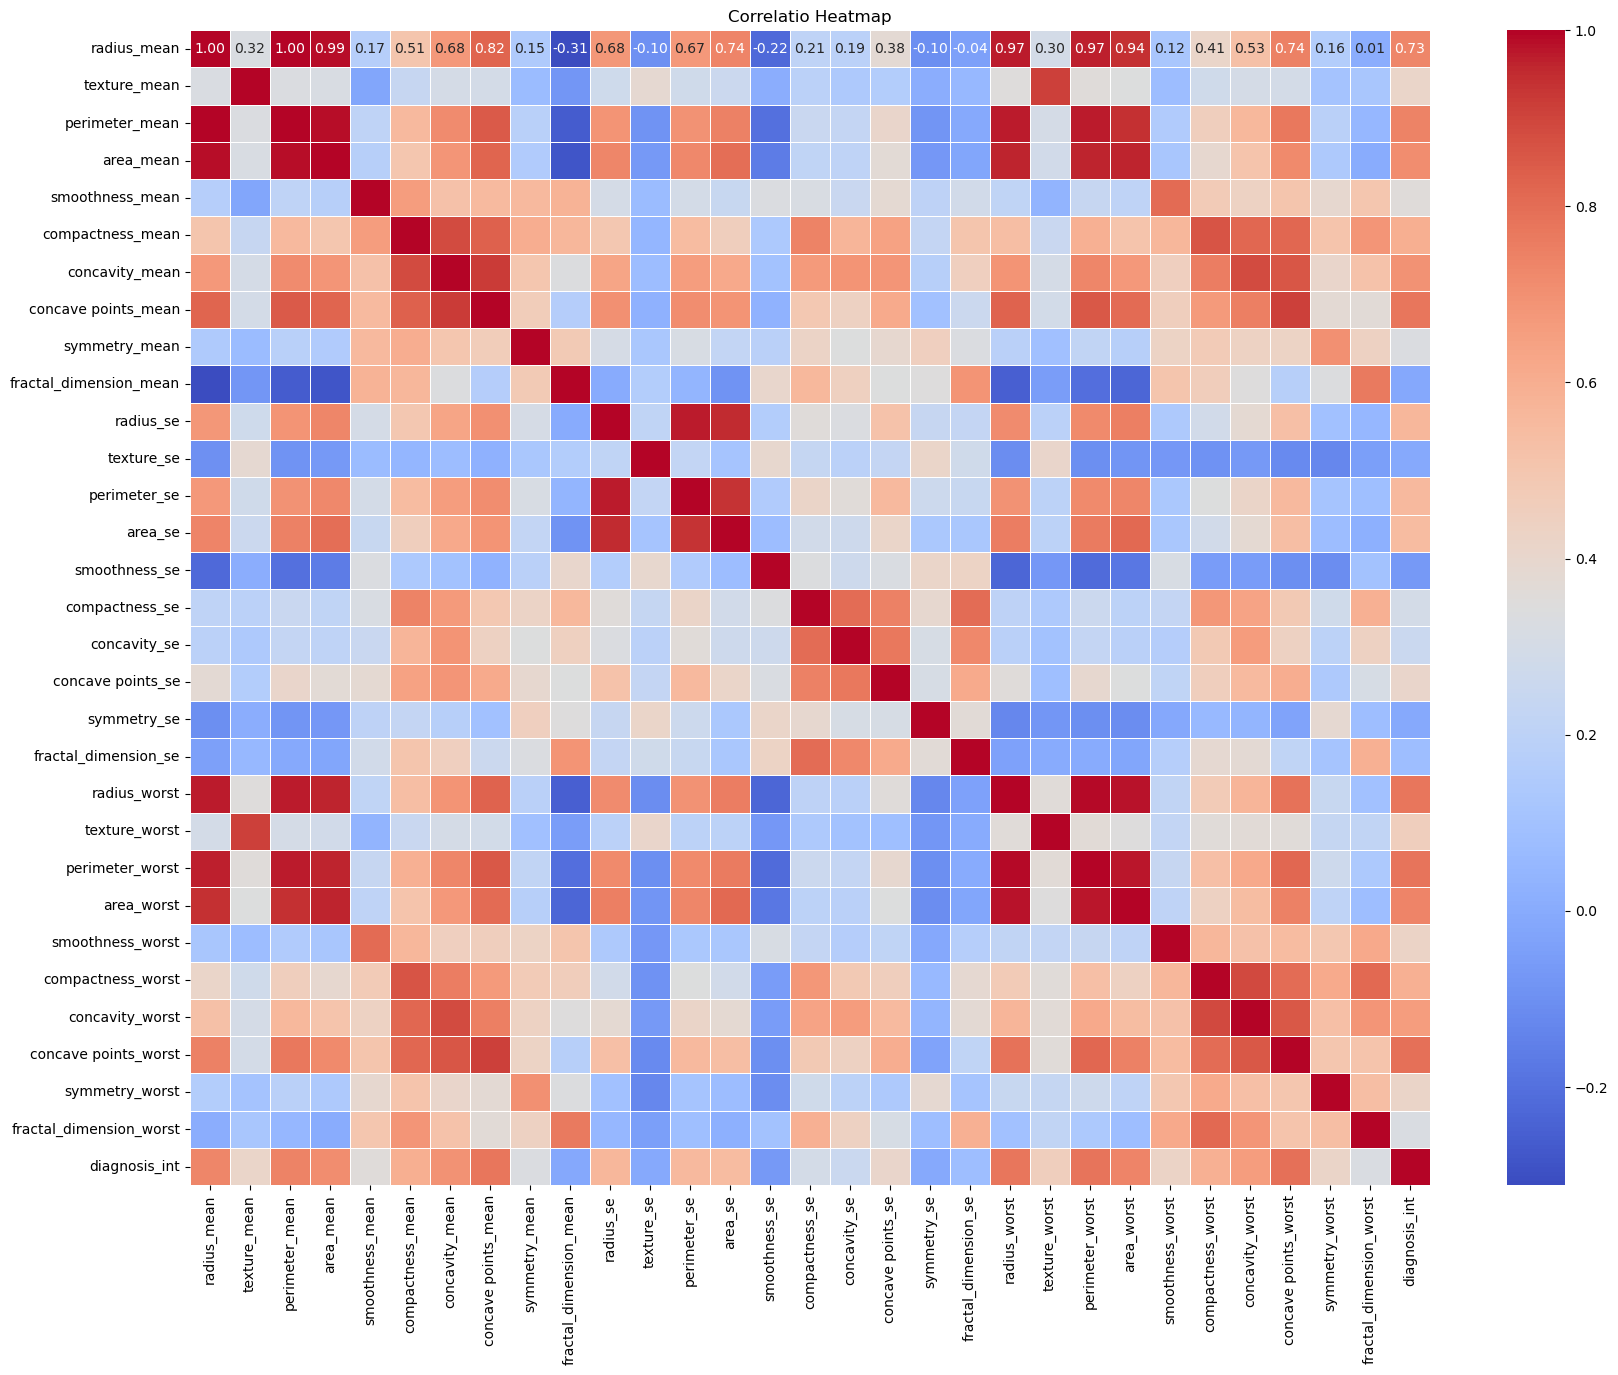

In [19]:
# Check the corelation btween featuers
features = df.drop(['diagnosis'], axis = 1)
corr = features.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot = True , fmt ='.2f', cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlatio Heatmap')
plt.show()

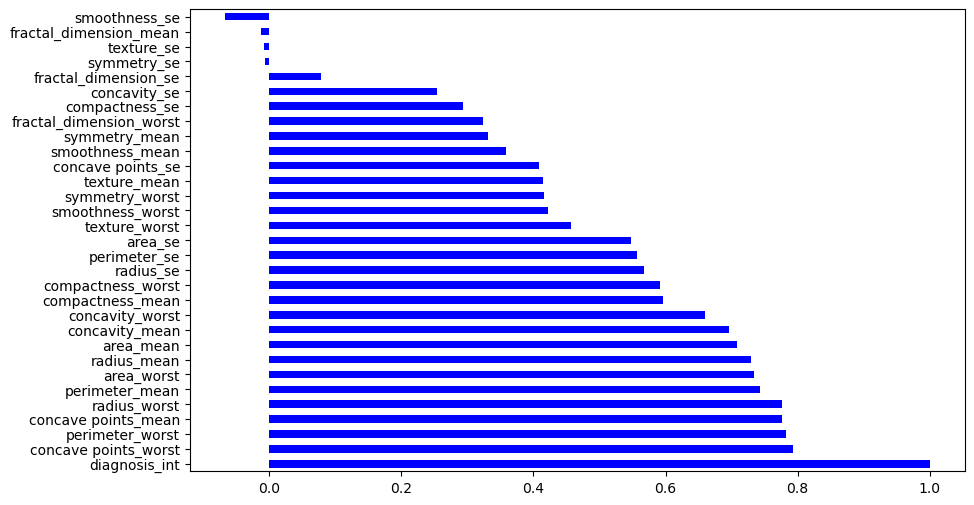

In [20]:
# Another way to check the corelation btween featuers
corr = features.corr()['diagnosis_int'].sort_values(ascending = False)
corr.plot(kind = 'barh', figsize = (10,6), color = 'blue', legend = False)
plt.show()

### Training and testing modles - 1

In [22]:
# Getting features, chose all except target
x = df.drop(['diagnosis','diagnosis_int'], axis = 1)
# Getting predictiong value
y = df['diagnosis']

In [23]:
# Spliting data to test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0) # random_state as 0 so the selection should be the same everytime we restart the modle

In [24]:
len(y_train)

455

In [25]:
len(x_test)

114

#### Models

#### 1- Logistic Regression

In [28]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score # these are importent to evaluate the model

In [29]:
# train the model
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [30]:
# Let the traind model to predict data from x_test data
y_pred = reg.predict(x_test)

In [31]:
# Evaluate the predicted data versus y_test
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        67
           M       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



#### Accuracy of Logistic Regression model is 95%

#### 2- Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 6, random_state = 123) # parameter (***) are optional so data did not change everytime we use model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [35]:
y_pred = dtree.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        67
           M       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



#### Accuracy of Decision Tree Classifer model is 95%

#### 3- Random Forest classfier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = rfc.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### Accuracy of Random Forest Classifier model is 96%

#### 4- KNeighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(x_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.94      0.95        67
           M       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



#### Accuracy of KNeighbors Classifier model is 94%

#### 5- SVC

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [50]:
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.90      0.99      0.94        67
           M       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Accuracy of SVC model is 93%

#### 6-AdaBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [54]:
y_pred = abc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.97      0.96        67
           M       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Accuracy of AdaBoost Classifier model is 96%

#### 7- Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [58]:
y_pred = gbc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.97      0.98        67
           M       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Accuracy of Gradient Boosting Classifier model is 97%

#### 8- Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [62]:
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        67
           M       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Accuracy of Naive Bayes model is 93%

### We get the highest accurecy from Gradient Boosting Classifier model with 97%

In [65]:
print("._._" *25)

._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._


### Training and testing modles - 2

In [67]:
# Getting features, dropping less collerated features
x = df.drop(['diagnosis','diagnosis_int','symmetry_se', 'texture_se', 'smoothness_se', 'fractal_dimension_mean'], axis = 1)
# Getting predictiong value
y = df['diagnosis']

In [68]:
# Spliting data to test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0) # random_state as 0 so the selection should be the same everytime we restart the modle

In [69]:
len(y_train)

455

In [70]:
len(x_test)

114

#### Models

#### 1- Logistic Regression

In [73]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score # these are importent to evaluate the model

In [74]:
# train the model
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [75]:
# Let the traind model to predict data from x_test data
y_pred = reg.predict(x_test)

In [76]:
# Evaluate the predicted data versus y_test
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.95      0.93      0.94        67
           M       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Accuracy of Logistic Regression model is 93%

#### 2- Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 6, random_state = 123) # parameter (***) are optional so data did not change everytime we use model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [80]:
y_pred = dtree.predict(x_test)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        67
           M       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



#### Accuracy of Decision Tree Classifer model is 95%

#### 3- Random Forest classfier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_pred = rfc.predict(x_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Accuracy of Random Forest Classifier model is 96%

#### 4- KNeighbors Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [90]:
y_pred = knn.predict(x_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.94      0.95        67
           M       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



#### Accuracy of KNeighbors Classifier model is 94%

#### 5- SVC

In [94]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [95]:
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.90      0.99      0.94        67
           M       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Accuracy of SVC model is 93%

#### 6-AdaBoostClassifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [99]:
y_pred = abc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.97      0.98        67
           M       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Accuracy of AdaBoost Classifier model is 97%

#### 7- Gradient Boosting Classifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [103]:
y_pred = gbc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        67
           M       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Accuracy of Gradient Boosting Classifier model is 96%

#### 8- Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [107]:
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        67
           M       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Accuracy of Naive Bayes model is 93%

### We get the highest accurecy from Random Forest Classifier and Adaboost classifier model with 97%